# Notebook 4: Plotring Geospatial data with geopandas and plotly

The objectives of this notebook are the following:

- Understand geolocalized data:
    - Lat, Lon, projections, types of geolocalized data, types of geometries. 
    - Basic choropleths.
- Preprocessing geolocalized data, load geometries and shapefiles.
- Choropleths
- Additional parameters
- Choropleths with Plotly

# Part I: Geospatial data

This notebook will teach you how to plot geospatial data. 

Geospatial data mostly comes in two formats, geolocated geometries (points, lines, polygons, ...) or rasters. In this notebook we will focus on geometries. However, if you want to dig into rasters by yourself, there are many useful libraries that work with rasters: 

- https://rasterio.readthedocs.io/en/latest/
- http://xarray.pydata.org/en/stable/


Let's start with the simples example from the Geopandas library. Let's start importing the required libraries and importing/creating basic data.

In [ ]:
from geopandas import read_file, datasets, GeoDataFrame, points_from_xy
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
df = DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
gdf = GeoDataFrame(
    df, geometry=points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf.head()

Now we can try to plot the latitudes and longitudes in a simple plain, without contemplating any coordinate reference system:

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(gdf.Longitude, gdf.Latitude)
plt.show()

In [ ]:
gdf.plot(figsize=(6, 6))
plt.show()

Notice that the main difference between the above two plots above is the shape of these. When calling plot from within the `gdf` itself (`gdf.plot()`), it respects the proportion of the coordinates, whereas if we set the axes and figsize apriori, we are setting the axes size.

Now let's check what is the crs attribute (coordinate reference system):

In [ ]:
gdf.crs

As you can see above, there is no *crs* established in this dataset. We are just plotting plain X and Y coordinates.

Nevertheless, when working with georeferenced data, we always need to take into account the coordinate system that we are using. CRS is the way in which the map is created/drawn. CRS are necessary as the Earth is a spheroid. There are no easy workarounds for unwrapping it! Thus, we need to work with projections.

Here you have a curated list of different projections:
https://en.wikipedia.org/wiki/List_of_map_projections

In addition, the following link will give you a basic introduction on the main things you need to know about CRS:
https://geopandas.org/docs/user_guide/projections.html



Now that you understand basic projections, let's use one of the basic datasets from the geopandas library to understand the data.

In [ ]:
world = read_file(datasets.get_path('naturalearth_lowres'))
world.head()

As you can see in the GeoDataFrame above, the column geometry contains a new data type! Geometry!

In [ ]:
world.dtypes

Geopandas is a very useful tool for quickly plotting our georeferenced datasets. When we talk about georeferenced datasets, we are talking about data that contains a column "geometry", where the spatial information is stored. Spatial information usually comes in the format of characteristics of each of the geometries. The main geometries tipically used are:

- Points
- LineStrings
- Polygons
- Multipolygons

Here you can find more information on creating polygons with python using `Shapely`: https://shapely.readthedocs.io/en/stable/manual.html

There are also other types of geometries that may be useful for specific cases but that are less common, such as:

- MultiPoints
- MultiLineStrings

And many other that you can find in the above url link.

Now let's create the simplest geometries and see what we can do with those. First, let's create the simplest Point, Linestring, Polygon, and MultiPolygon:

In [ ]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [ ]:
Point(0, 0)

In [ ]:
LineString([[0, 0], [1, 1]])

In [ ]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [ ]:
MultiPolygon([Polygon([[2, 0], [3, 0], [3, 1], [2, 1], [2, 0]]),
              Polygon([[1, 1], [1, 2], [2, 2], [2, 1]])])

Each of these geometries can then provide information on the characteristics or information within those regions. With these simple examples showing how to create simple polygons it doesn't make sense, but when we move to georeferenced data, that's what it's all about! 

Next, we will create a GeoDataFrame from these different geometries:

In [ ]:
gdf_geometries = GeoDataFrame([
    Point(1.5, 0.5),
    LineString([[0.25, 1.25],  [0.75, 1.75]]),
    Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]),
    MultiPolygon([Polygon([[2, 0], [3, 0], [3, 1], [2, 1], [2, 0]]),
              Polygon([[1, 1], [1, 2], [2, 2], [2, 1]])])
], columns=['geometry']
            )

In [ ]:
gdf_geometries

Now let's create a variable that indicates the type of geometry in each of the rows in the geometry column:

In [ ]:
gdf_geometries['type_of_geometry'] = gdf_geometries.geometry.type

And now let's plot these:

In [ ]:
gdf_geometries.plot('type_of_geometry', alpha=.5, legend=True)
plt.show()

All of these geometries are represtend in a plane with the X and Y axis. However, in real life, geometries are usually represented in a coordinate reference system (CRS).

Now, let's start with the simplest case to show how powerful geopandas is. Let's plot the above "world" dataset imported from geopandas.

In [ ]:
world.plot()

It's as simple as that! Now let's add some colors:

In [ ]:
world.plot('name', figsize=(12, 12), cmap='tab20')
plt.show()

This plot shows the countries as polygons, and comes in a specific CRS. To check the "crs" we can check the attribute from the `GeoDataFrame`, which is a geopandas extension of the pandas `DataFrame`, but including a column names "geometry", where the specific geometry of each row is specified. This GeoDataFrame contains Polygons (for countries that are one single geometry) and MultiPolygons (for example, for countries that have islands or have multiple pieces separated).

Next, by using the `gdf.crs` command we can check on the coordinate reference system:

In [ ]:
world.crs

The above command shows that this dataset is stored in the "EPSG:4326" crs, which is the most common in many cases. This crs, is called the "WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS", and is referenced as EPSG:4326. This crs uses degrees as units, and shows an adapted version of earth, which is useful for large representations of earth, but shows a distorted image, for example, when we want to use it for showing maps in the scale of meters.

---

One last important thing before downloading your first shapefile. The extension `.shp` in the files that you will donwload, usually come inside a folder that have the same name. However, the shapefile itself doesn't provide all the information. Inside the folder that you will download, there are usually other files with different extensions (e.g. `.cpg`, `.prj`, `.shx`, etc...). Make sure to store all of them, and copy the entire folder unzipped into the `data/external/` folder as usual.

# Exercise 1:


Download the data from: 

https://gadm.org/download_country.html

and select the shapefiles of Spain. Plot it using geopandas, giving each "state" or "comunidad autonoma" (variable NAME_1) a different color.

To read the shapefile, you will need to load the file using the `read_file()` function from the geopandas package, with `read_file('data/external/gadm36_ESP_shp/gadm36_ESP_3.shp')`.

Since we will use this geodataframe in future exercises, we recommend tu store in a variable called `gdf_spain`.

Now plot the map:

Now try plotting without the Canary Islands, as these will altere your plot. Remember to color the geometries by the variable 'NAME_1' and to use the `cmap="tab20"` parameter.

# Part II: Projections and plotting spatial statistics

Using geopandas we can also easily transform this dataset into a new projection, for example, the Mercator one.

In [ ]:
# Reproject to Mercator (after dropping Antartica)
world_new = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world_new = world_new.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work

fig, ax = plt.subplots(figsize=(12, 12))
world_new.plot(ax=ax)
plt.show()

Now we can plot some spatial statistics, like population estimated by country (the variable "pop_est"). In addition, we will also add a colorbar legend, and modify it's attributes to make it look better:

In [ ]:
# Reproject to Mercator (after dropping Antartica)
world_new = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world_new = world_new.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work

fig, ax = plt.subplots(figsize=(12, 12))
world_new.plot('pop_est', 
               legend=True, edgecolor='black', ax=ax, # legend=True indicates to plot the colorbar, 
               # edgecolor controls the outlines color of geometries
               legend_kwds={'label': "Population estimate by Country", # label indicates the title of the legend
                    'orientation': "horizontal", # indicates the orientation of the legend
                            'shrink':.8, # makes the legend smaller
                            'pad':.1}) # shifts or moves out the legend or colormap
ax.set_title("Mercator") # sets the title of the figure
plt.show()

In addition, geopandas allows to obtain different features from the "geometry" columns, for example, we can obtain the area of each geometry, by using:

In [ ]:
world.geometry.area

This is very useful, as we can create new variables containing information on the spatial statistics of each geometry, 

In [ ]:
world['area_geodesic'] = world.geometry.area

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world.plot('area_geodesic', 
           legend=True, edgecolor='k', ax=ax,
           legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1})
ax.set_title("EPSG:4326")
plt.show()

Notice that this area is different depending on the projection that we use when computing it:

In [ ]:
# Reproject to Mercator (after dropping Antartica)
world_new = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world_new = world_new.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work
world_new['area'] = world_new.geometry.area

fig, ax = plt.subplots(figsize=(12, 12))
world_new.plot('area', legend=True, edgecolor='k', ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1})
ax.set_title("Mercator - EPSG:3395")
plt.show()

Now let's go back to our previous plot on population by country, and change the projection from "Mercator" to 'EPSG:4326', and try to improve this plot, by modifying basic attributes.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world.plot('pop_est', 
               legend=True, edgecolor='black', ax=ax, # legend=True indicates to plot the colorbar, 
               # edgecolor controls the outlines color of geometries
               legend_kwds={'label': "Population estimate by Country", # label indicates the title of the legend
                    'orientation': "horizontal", # indicates the orientation of the legend
                            'shrink':.8, # makes the legend smaller
                            'pad':.1}) # shifts or moves out the legend or colormap
ax.set_title("EPSG:4326") # sets the title of the figure
plt.show()

Now this map shows us a simple yet informative figure of the population estimates of each country. We usually call this a "Choropleth Map", and it shows pre-defined areas colored in proportion to a scale and a statistical variable representing an aggregated summary of a geographic characteristic within each area in the dataset. 

Notice that China and India have population values way above the rest of the countries, and thus the we need to scale them somehow. Check the following histogram:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
world.pop_est.hist(bins=20, edgecolor='k')
plt.show()

Since they have too large values compared to the rest of the world, the rest of the colors are too low on the colorscale. Thus, now let's try to improve the above plot, by reducing the maximum value of the color bar. By using the `vmax` parameter, we can set a top at the color of this Choropleth:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world.plot('pop_est', legend=True, edgecolor='k', ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1}, vmax=1e8) #vmax=100 000 000, 
                                            #as this is a more common value among countries
plt.show()

This now shows all countries with populations larger than 100 million in yellow.

Now let's do the same plot only for Europe:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world[world.continent == 'Europe'].plot('pop_est', legend=True, edgecolor='k',
           ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1})
plt.show()

The above plot shows that Russia is way too large for this plot, and perhaps we should remove it from the plot. Let's try removing it:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world[(world.continent == 'Europe') & (world.name != 'Russia')].plot('pop_est', 
                                                                     legend=True, edgecolor='k',
           ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1}, cmap='Greens')
plt.show()

The Islands on the lower left side of the map are too far apart, and thus we want to remove them. Another way to reframe the map, instead of removing a geometry, is to limit the axes (`set_xlim()` and `set_ylim()`) such that we only show the information desired:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world[(world.continent == 'Europe') & (world.name != 'Russia')].plot('pop_est', legend=True, edgecolor='k',
           ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1}, cmap='Greens')
plt.xlim([-30, 45])
plt.ylim([30, 85])
plt.show()

## Exercise 2: Do your own choroplteh

In this exercise you need to plot a choropleth of the GDP for each country in Asia. Remember to adjust the X and Y axis, with the colormap `gnuplot`, set an horizontal legend, and plot the colors with the variable "gdp_md_est", with `legend=True`, and try to find a `vmax` value that makes sense for this variable.

# Part III: 

Now let's introduce a dataset with latitudes and longitudes, where we get some of the world cities:

In [ ]:
world_cities = read_file(datasets.get_path('naturalearth_cities'))

In [ ]:
world_cities.head()

In [ ]:
world_cities.name.unique()

The above are the cities included in the dataset. Now we can plot them using `.plot()`:

In [ ]:
world_cities.plot(figsize=(12, 12), markersize=3)

And now let's plot the cities and the geometries at the same time:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world.plot('pop_est', legend=True, edgecolor='k', vmax=5e7, alpha=.5, cmap='Greens',
           ax=ax,legend_kwds={'label': "Population estimate by Country",
                        'orientation': "horizontal", 'shrink':.8, 'pad':.1})
world_cities.plot(ax=ax, color='k', markersize=3)
plt.show()

# Part IV: Sjoin, overlay, and merge functions

A very important and interesting option to consider when using geospatial data is that we can merge different sources of data using their spatial information. For example, we can perform an overlay and obtain in which country does each city belong to, or we can select overlapping regions between two geodataframes.

To make an example, we want to compare different ways of plotting the same information of populations. To do so, we will use the `sjoin()` method from the `geopandas` package: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

We are going to merge the two geodataframes available (the geometries or polygons of countries, and the city points).

In [ ]:
from geopandas import sjoin

In [ ]:
sjoin(world.rename(columns={'name':'country'}),
      world_cities.rename(columns={'name':'city'}))

The order in which the geodataframes are introduced in the `sjoin()` function does matter.

Notice the difference with the following one:

In [ ]:
gdf_cities_world_with_attributes = sjoin(world_cities.rename(columns={'name':'city'}),
                                         world.rename(columns={'name':'country'}))

In [ ]:
gdf_cities_world_with_attributes.head()

The geometry from the geodataframe that was included as the first argument in the `sjoin()` function, is the one that is preserved.

Now we can plot this geodataframe. We will make bubbles proportional to the size of the population in that country, and located at the latitudes and longitudes of the cities:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_cities_world_with_attributes.plot('pop_est', 
                                      markersize=1000*gdf_cities_world_with_attributes.gdp_md_est/gdf_cities_world_with_attributes.gdp_md_est.max(),
                                      ax=ax)
plt.show()

This is called a proportional symbols map. To make this figure easier to understand, we can add the layer of the geometries on top of it with transparence `alpha=.2`:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_cities_world_with_attributes.plot('pop_est',
                                      markersize=1000*gdf_cities_world_with_attributes.gdp_md_est/gdf_cities_world_with_attributes.gdp_md_est.max(),
                                      ax=ax)
world.plot(ax=ax, facecolor='none', edgecolor='k', alpha=.2)
plt.show()

Lastly, we can obtain the centroids of polygons by simply doing:

In [ ]:
world.geometry.centroid

Then, we can plot these centroids by doing:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world.geometry.centroid.plot(ax=ax)
world.plot(facecolor='none', edgecolor='k', ax=ax)
plt.show()

If we want to change the geometries to the centroids of the polygons, one way to do it is the following. We create a copy of the geodataframe using the `.copy()` funciton, store into a new variable, and then overwrite the variable "geometry" as the centroids that are interested in.

In [ ]:
world_copy = world.copy()
world_copy['geometry'] = world_copy['geometry'].centroid

Centroids are the middle point of geometries. See https://en.wikipedia.org/wiki/Centroid for more information.

Now let's plot the centroids of countries, and colour them using the variable "pop_est":

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world_copy.plot('pop_est', ax=ax)
plt.show()

In the above plot, China and India have too large populations as well, so we can reduce the `vmax` to 100 million:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world_copy.plot('pop_est', ax=ax, vmax=1e8)
plt.show()

Now that we have the centroids, let's create a new variable indicating the area of each polygon. Notice that we are using the `world` geodataframe with the polygons, and not the `world_copy` with the centroids, we are just creating a new column on the `world_copy` geodataframe using the information from the other geodataframe `world`.

In [ ]:
world_copy['area'] = world['geometry'].area

Now let's use that information to plot the size of the circles or markers as the variable "area" that we just created.

Notice that the parameter that allows us to do this is the `markersize` one, and that we can give different sizes to the different points, since the length of the values that we are passing is the same as the number of rows in the other geodataframe:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
world_copy.plot('name', 
          ax=ax,
          markersize=world_copy['area'],
          cmap='tab20')
plt.show()

# Exercise 3: 

Make a proportional symbol map for Spain. As you will see, since the sizes of the regions used are more similar, it will be a better representation than when using the entire world. 

Follow these steps:

- Use the centroids of the geometries (gdf.geometry.centroid) as the center for the bubbles.
- Plot polygon with `facecolor='none'` and `edgecolor='black'` as reference geometries.
- Use the areas of the geometries as the proportional size of the bubbles.
- Remember to exclude the "Islas Canarias", with something like: `gdf_spain[gdf_spain.NAME_1 != 'Islas Canarias']`, otherwise it will distort your plot!

It should look like this!

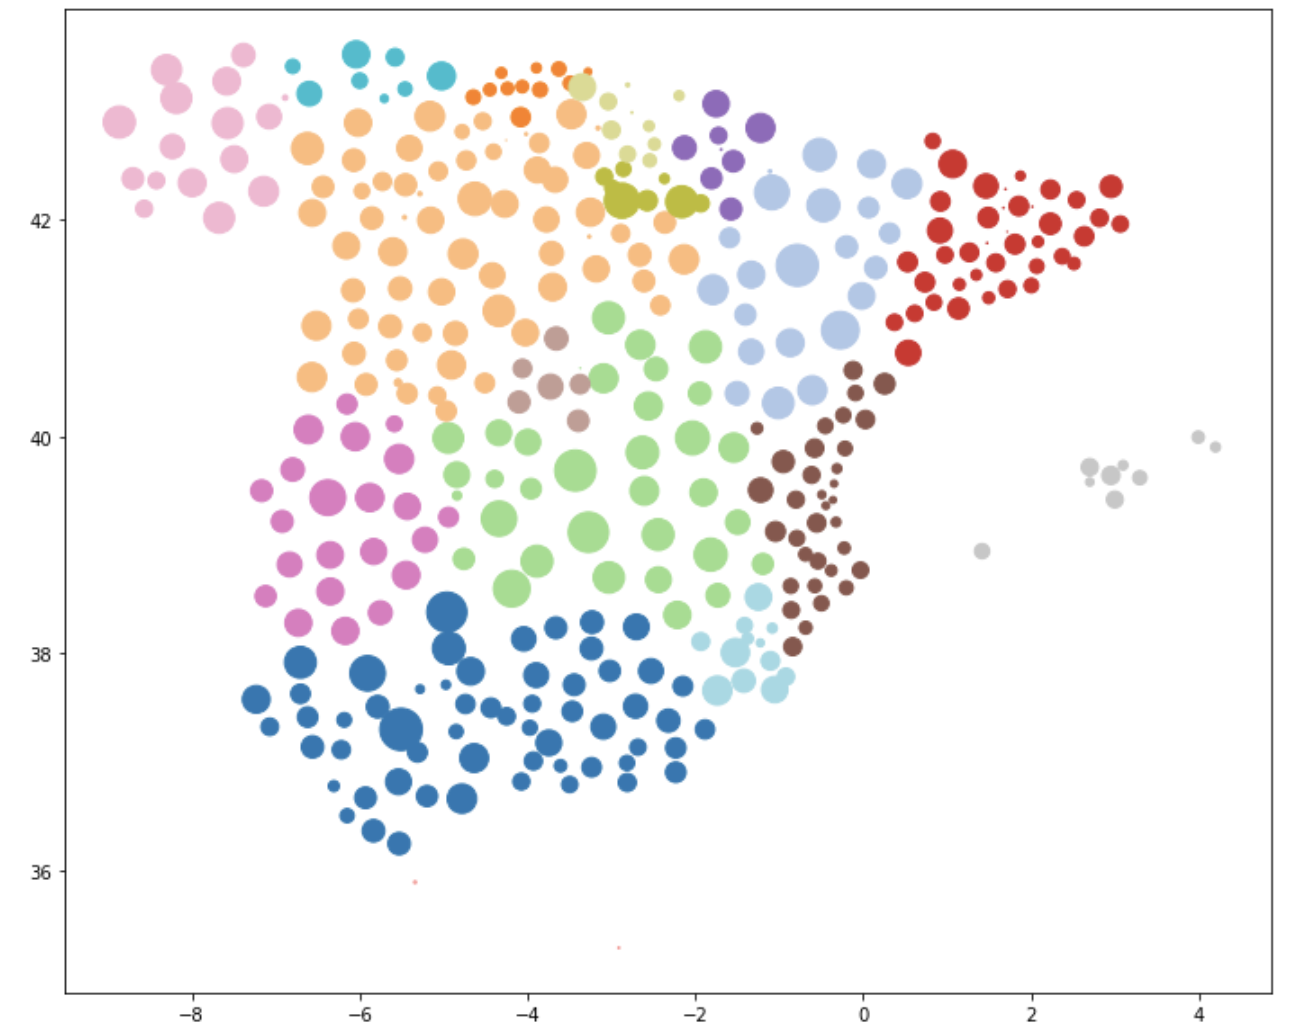

## Example: Adding road (Linestrings) into our plots

Once you have drawn the spanish "CCAA" from the above shapefile on Exercise 1 and 3, now download the files "Transporte" from the following link: 

http://centrodedescargas.cnig.es/CentroDescargas/buscar.do?filtro.codFamilia=BT100#

Especifically, make sure that you download the .zip file:

- BTN100_TEMA6_TRANSPORTES_2021


In [ ]:
gdf_roads = read_file('data/external/BTN100_TEMA6_TRANSPORTES_2021/BTN100_0605L_CARRETERA.shp')

Make sure that the above cell works, if you did not download the right shapefile, or you didn't place it in the right place it will throw an error. 

Now we will select the region overlapping both geodataframes (the Spain geodataframe and the imported roads). 

In the geodataframe of spain with the "CCAA" we will select only "Cataluña".

Once we have a dataframe with all the regions of Catalonia, we perform the `sjoin()` with the roads dataset that you just downloaded. 

IMPORTANT: Notice that they are not on the same projection! Thus, we need to transform the roads file into a EPSG:4326. Then, plot them together, to make them look nice. 

In [ ]:
gdf_catalonia = gdf_spain[gdf_spain.NAME_1 == 'Cataluña']
roads_catalonia = sjoin(gdf_roads.to_crs('EPSG:4326'), gdf_catalonia)

In [ ]:
from geopandas import sjoin

fig, ax = plt.subplots(figsize=(12, 12))
gdf_catalonia.plot(facecolor='none', edgecolor='k', ax=ax, zorder=10)
roads_catalonia.plot(ax=ax, color='grey', alpha=.2, linewidth=.5)
plt.axis('off')
plt.show()

# Part V: Plotly

We also want to use and show you Plotly, as the background maps are more elaborated, and look better and fancier. It also has many other useful parameters that you can tune! Check this link: https://plotly.com/python/maps/

We will introduce the plotly.express form of plotting things! Plotly has some very nice ways of visualizing spatial data, and it can use the same data formats that are available from geopandas! Let's make a simple plot of the world dataset, using the `choropleth_mapbox` function from the `plotly.express`.

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(world,
                           geojson=world.geometry,
                           locations=world.index,
                           color="pop_est",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="open-street-map",
                           zoom=0.5)
fig.show()

As you can see, the parameters are kind of similar, but need to be specified explictly.

# Exercise 4: Create a plotly map of Spain 

Use the same geodataframe from Exercise 1.

Now we want to do the plot of the "states" of Spain from the dataset that you downloaded in Exercise 1. Set the center of the plot at `lat=40.2` and `lon=-3.7`, with a `mapbox_style="open-street-map"`, and colored by CCAA, with `color=NAME_1`.

In [ ]:
fig = px.choropleth_mapbox(data_frame=gdf_spain,
                           geojson=gdf_spain.geometry,
                           locations=gdf_spain.NAME_2,
                           center={"lat": 40.2, "lon": -3.7073},
                           mapbox_style="open-street-map",
                           zoom=4,
                           color='NAME_1')
fig.show()

# Extra example:

Lastly, we show another example, where it is good to use the plotly `choropleth.mapbox` since the hover can be useful. First, download the spatial data:

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

Then download the csv file with the attributes:

In [ ]:
from pandas import read_csv
df = read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

Now that we have all the data, we can plot this data:

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Great! As you can see, there are specific regions where the unemployent is clearly above the average, such as some southern parts of the US, as well as some inner-Eastern parts of the US. The hover and scale could be further improven in many ways, such as showing the mean age of population, or other attributes that might help understand the large unemployment rates in those regions.

Great! You have now completed the notebook on advanced visualization tools! In the next notebook we will dive into Dashboards!